In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


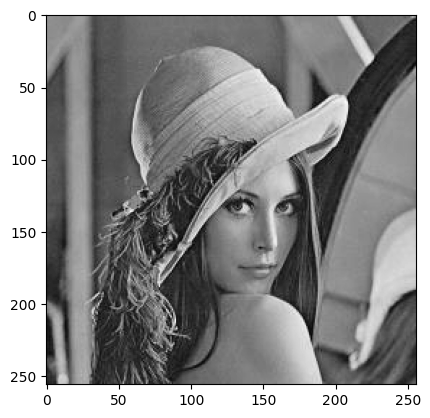

In [3]:
img = cv2.imread('/content/drive/MyDrive/colabp/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

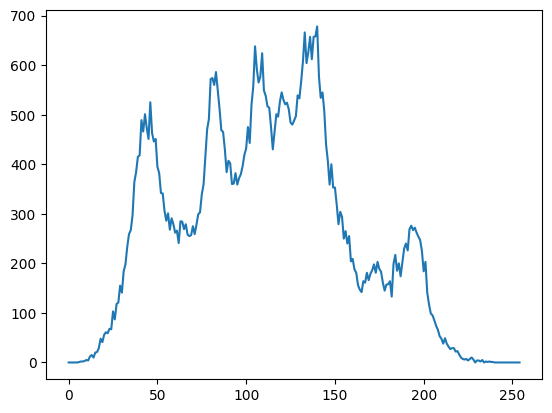

In [4]:
hist=cv2.calcHist([gImg1],[0],None,[255],[0,255])
plt.plot(hist)



(256, 256)


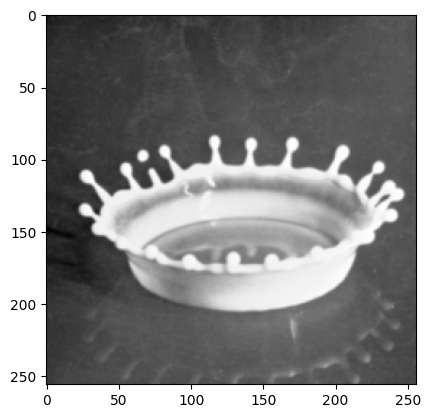

In [39]:
#img = cv2.imread('/content/drive/MyDrive/colabp/Images/cell-bright.bmp')
img = cv2.imread('/content/drive/MyDrive/colabp/Images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

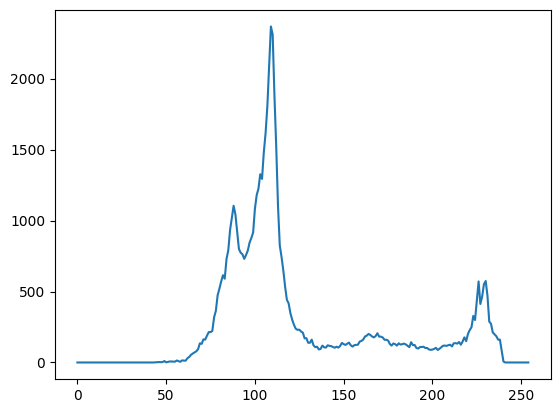

In [40]:
hist=cv2.calcHist([gImg1],[0],None,[255],[0,255])
plt.plot(hist)


In [29]:
gBin = np.zeros((gImg1.shape[0],gImg1.shape[1]))

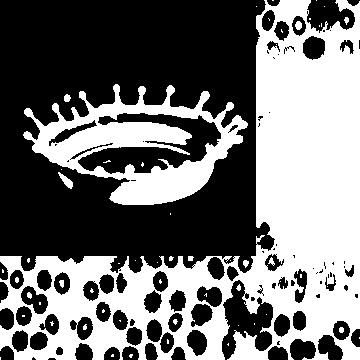

In [41]:
T=180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w]>T:
      gBin[h,w]=255
    else:
      gBin[h,w]=0

cv2_imshow(gBin)


In [42]:
T1 = 50
T2 = 0
T0 = 1

outImg = np.zeros((gImg1.shape[0],gImg1.shape[1]))

In [43]:
def threshold_update(h,w,img,output,T1):
  sum1 = 0
  count1= 1
  sum2 = 0
  count2= 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if (output[h,w]==255):
        sum1 = sum1+img[h,w]
        count1 = count1+1
      else:
        sum2 = sum2+img[h,w]
        count2 = count2+1

  avg1= sum1 / count1
  avg2 = sum2 /count2

  T2= np.int32(avg1+avg2)/2
  return T2


In [44]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w]>T1:
      outImg[h,w]=255
    else:
      outImg[h,w]=0

In [45]:
while True:
  T2 = threshold_update(gImg1.shape[0],gImg1.shape[1],gImg1,outImg,T1)
  if (np.abs(T2-T1)<T0):
    for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if gImg1[h,w]>T1:
          outImg[h,w]=255
        else:
          outImg[h,w] = 0
  break;
else:
  T1 = T2
  for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if gImg1[h,w]>T2:
          outImg[h,w]=255
        else:
          outImg[h,w] = 0



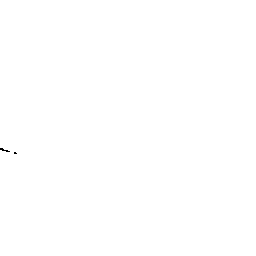

85.5


In [46]:
cv2_imshow(outImg)
print(T2)